In [1]:
import sys
sys.path.append("../")

In [2]:
from libraries.dataManipulation import *
from libraries.gridManipulation import *
import time
import datetime
import pandas as pd

In [23]:
def convert_to_unixtimestamp(datetime):
    time.mktime(datetime.timetuple())

In [3]:
#GRID CONFIGURATION IS DECLARED
o_x = 5000
o_y = -10000
o = (o_x,o_y)

patch_width = 3750
patch_height = 3000
patch_size = (patch_width, patch_height)

total_patches = (18,5)
abs_total_patches = total_patches[0]*total_patches[1]

grid_angle = 0.9

trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/background_images/EHV.Perron2.1_multisensor.png
background fetched. Accessible as <this-object>.bg


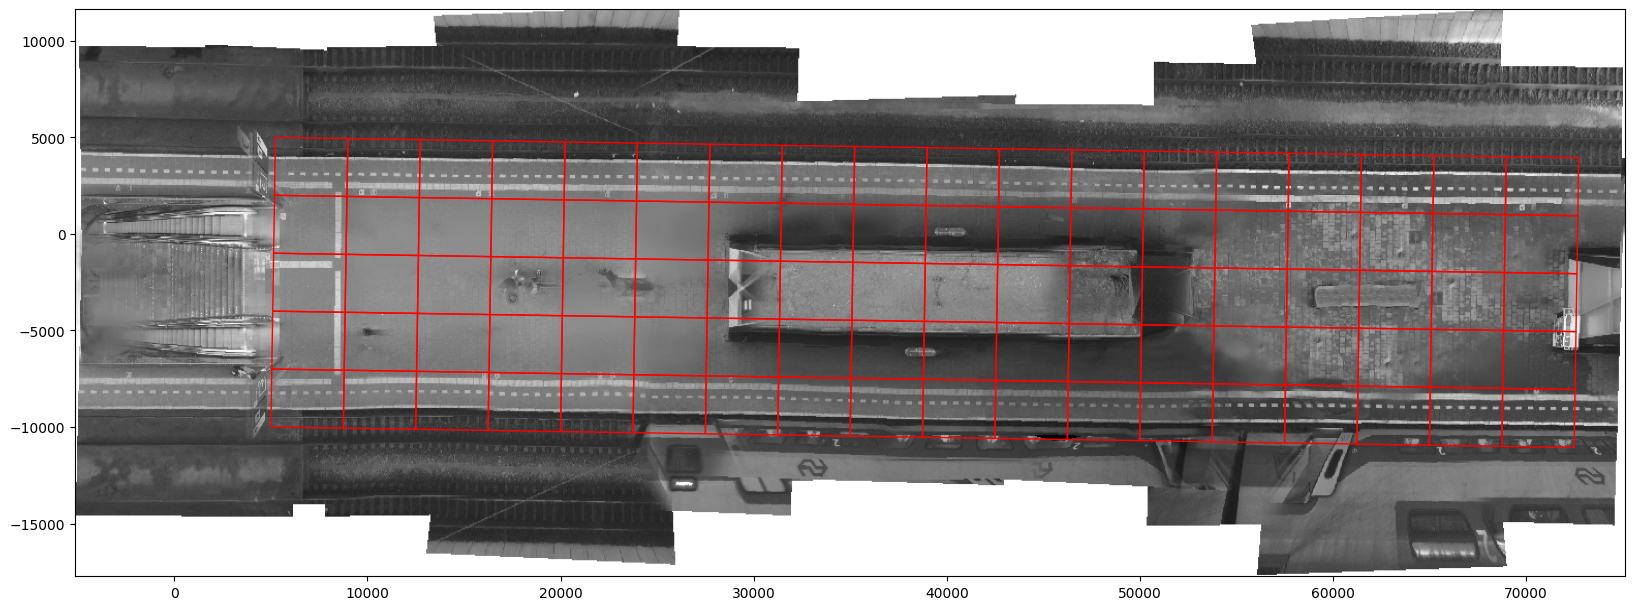

In [4]:
#GRID IS CREATED USING CONFIG
grid = create_grid(o, patch_size, total_patches, grid_angle)
#GRID IS PLOTTED ON STATION
plot_grid(grid, 'ehv')

In [5]:
# Storage connection class
dh = SociophysicsDataHandler()

daylist = dh.list_files('/ehv/platform2.1')['name']
day_numbers = []
for i in range(len(daylist)):
    day_numbers.append(int(daylist[i]))

targeting path /storage/surfsara/ProRail_USE_LL_data//ehv/platform2.1
Files listed. Accessible as <this-object>.filelist


In [37]:
%%time
%%capture
#data = getHours(0,2,20210330, 'ehv')
data = getDay(20220320, 'ehv')

data = data.drop(data[data.x_pos < o_x].index)
data = data.drop(data[data.y_pos < o_y].index)
data = data.drop(data[data.x_pos > (total_patches[0]-1)*patch_width].index)
data = data.drop(data[data.y_pos > (total_patches[1]-1)*patch_height].index)

data = data.drop(['datetime'], axis=1)
data['time'] = (data['date_time_utc'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

### !!!!! COLUMN ON WHETHER TRAIN IS IN STATION AT THAT MOMENT HAS TO BE ADDED !!!! ####

CPU times: user 16.1 s, sys: 3.37 s, total: 19.5 s
Wall time: 22.4 s


In [38]:
data

,date_time_utc,tracked_object,y_pos,x_pos,time
0,2022-03-19 23:00:00.000,3625345,-2609.0,62330.0,1647730800
1,2022-03-19 23:00:00.000,3625359,1184.0,14600.0,1647730800
2,2022-03-19 23:00:00.000,3625382,-3057.0,59640.0,1647730800
4,2022-03-19 23:00:00.000,3625508,1804.0,13022.0,1647730800
5,2022-03-19 23:00:00.000,3625510,-215.0,22081.0,1647730800
...,...,...,...,...,...
19974616,2022-03-20 22:59:59.800,3666307,-4962.0,62766.0,1647817199
19974617,2022-03-20 22:59:59.800,3666362,1803.0,63683.0,1647817199
19974618,2022-03-20 22:59:59.900,3666228,-3333.0,60091.0,1647817199
19974620,2022-03-20 22:59:59.900,3666307,-4949.0,62837.0,1647817199
